In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('graduate_admissions.csv')
print(df.head())
print(df.describe())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Admitted  
0         1      0.92  
1         1      0.76  
2         1      0.72  
3         1      0.80  
4         0      0.65  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    1

In [11]:
df = df.drop(columns=['Serial No.'])


In [19]:
le = LabelEncoder()
df['Research'] = le.fit_transform(df['Research'])
df['Admitted'] = le.fit_transform(df['Admitted'])

In [22]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [20]:
X = df[['GRE Score', 'CGPA']]  
y = df['Admitted']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.95      0.96      0.95        91

    accuracy                           0.91       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.91      0.91      0.91       100



[Text(0.5199652777777778, 0.9666666666666667, 'x[1] <= 7.665\ngini = 0.13\nsamples = 400\nvalue = [28, 372]'),
 Text(0.20833333333333334, 0.9, 'x[0] <= 301.0\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.1111111111111111, 0.8333333333333334, 'x[1] <= 7.645\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.05555555555555555, 0.7666666666666667, 'x[0] <= 297.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.027777777777777776, 0.7, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.08333333333333333, 0.7, 'x[1] <= 7.44\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.05555555555555555, 0.6333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1111111111111111, 0.6333333333333333, 'x[1] <= 7.48\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08333333333333333, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1388888888888889, 0.5666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16666666666666666, 

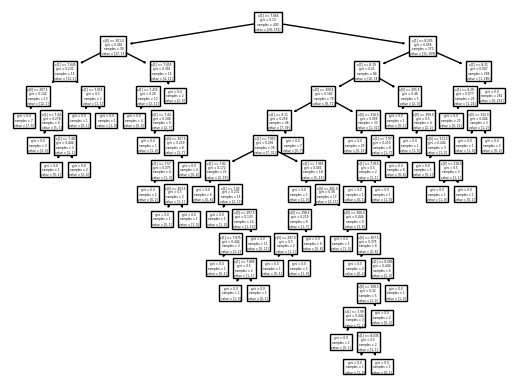

In [26]:
plot_tree(dt_classifier)